In [1]:
%matplotlib inline
import uproot
import hist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak
import plotly.express as px
import seaborn as sns

In [2]:
fileEx = uproot.open("/global/homes/v/vsharma2/Git/Position_reconstruction/output/ds3615_M2_3_6_MeV.root")

In [3]:
fileEx['outputTree'].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
channel              | int32_t                  | AsDtype('>i4')
riseTime             | double                   | AsDtype('>f8')
decayTime            | double                   | AsDtype('>f8')
delay                | double                   | AsDtype('>f8')
TVL                  | double                   | AsDtype('>f8')
TVR                  | double                   | AsDtype('>f8')
IsNear               | bool                     | AsDtype('bool')


In [4]:
fileArray = [uproot.open(("/global/homes/v/vsharma2/Git/Position_reconstruction/output/total_ds{}_M2_3_6_MeV.root".format(i))) for i in range(3601, 3616)]
treeArray = [fileArray[i]['outputTree'] for i in range(0, 15)]
arrays = [treeArray[i].arrays(['IsNear', 'riseTime', 'decayTime', 'delay', 'TVL', 'TVR'], library='pd') for i in range(0, 15)]

### Plot distribution of near events and far events

In [5]:
def plotDistribution(arrays):
    nearCounts = [np.count_nonzero(arrays[i]['IsNear']) for i in range(0, 15)]
    farCounts = [np.size(arrays[i]['IsNear']) - np.count_nonzero(arrays[i]['IsNear']) for i in range(0, 15)]
    percentages = [(nearCounts[i] * 100)/(nearCounts[i] + farCounts[i]) for i in range(0,15)]
    # set width of bar
    barWidth = 0.25
    fig, ax = plt.subplots(figsize =(16, 8))
 
    # Set position of bar on X axis
    br1 = np.arange(len(nearCounts))
    br2 = [x + barWidth for x in br1]
    #br3 = [x + barWidth for x in br2]
 
    # Make the plot
    plt.bar(br1, nearCounts, color ='gray', width = barWidth, edgecolor ='grey', label ='nearCounts')
    plt.bar(br2, farCounts, color ='teal', width = barWidth, edgecolor ='grey', label ='farCounts')
    #plt.bar(br3, CSE, color ='b', width = barWidth,
    #edgecolor ='grey', label ='CSE')

    # Adding Xticks
    plt.xlabel('Dataset', fontweight ='bold', fontsize = 15)
    plt.ylabel('Counts', fontweight ='bold', fontsize = 15)
    #plt.xticks([r + barWidth for r in range(len(IT))],
    #['2015', '2016', '2017', '2018', '2019'])
    plt.xticks([r + barWidth for r in range(len(nearCounts))], [i for i in range(3601,3616)])
    plt.yticks(np.arange(0, max(farCounts)+1000, 1000))
    pairs = zip(nearCounts, percentages)
    for i, values in enumerate(pairs):
        plt.text(i, values[0] + 500, f"{values[1]:.1f}%", ha='right', va='top')
    plt.legend()
    plt.show()

### Plotting variables

In [8]:
def plot_columns(df, bool_col):
    # Create a list of all column names in the dataframe
    column_names = list(df.columns)

    # Remove the boolean column from the list of column names
    column_names.remove(bool_col)
    
    fig, ax = plt.subplots()
    markers = ['o', 'x']
    # Loop through all pairs of columns
    for i in range(len(column_names)):
        for j in range(i+1, len(column_names)):
            # Create a scatter plot of the two columns, with markers based on the boolean column
            plt.scatter(df[column_names[i]], df[column_names[j]], c=df[bool_col].map({True: 'limegreen', False: 'steelblue'}), alpha=0.8)

            # Set the axis labels and title
            plt.xlabel(column_names[i])
            plt.ylabel(column_names[j])
            plt.title(f'{column_names[i]} vs {column_names[j]}')
            ax.legend(handles=[plt.Line2D([], [], marker='o', color='limegreen', label='Near'), plt.Line2D([], [], marker='o', color='steelblue', label='Far')],title=bool_col)
            # Display the plot
            plt.show()

In [18]:
def analyseDataset(arrays):
    df = pd.concat(arrays)
    print(f"Length of dataset -- {len(df)}")
    number_inf = df[df == np.inf].count()
    print("Number of inf values:")
    print(f"{number_inf}")
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna()
    print("Maximum values of fields after removing inf values are:")
    print(df.max())
    fig, ax = plt.subplots(1,5, figsize=(20,5))
    df.hist(bins=1000, figsize=(20,15), range=[-25,25], ax=ax)
    fig.supxlabel('Time')
    indexL = df[ (df['riseTime'] > 100) | (df['riseTime'] < -100) | (df['decayTime'] > 100) | (df['decayTime'] < -100) | (df['delay'] > 100) | (df['delay'] < -100) | (df['TVL'] > 100) | (df['TVL'] < -100) | (df['TVR'] > 100) | (df['TVR'] < -100)].index
    df_filtered = df.drop(indexL)
    plot_columns(df_filtered, 'IsNear')

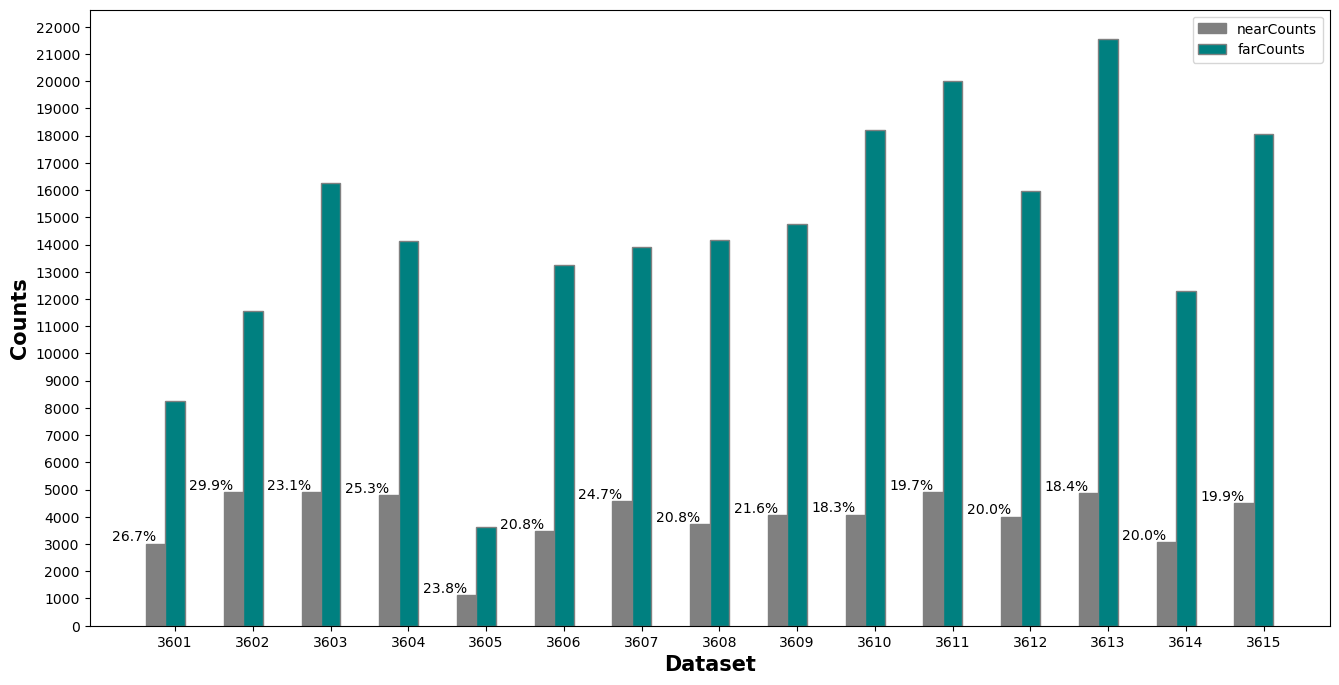

In [19]:
plotDistribution(arrays)

Length of dataset -- 276076
Number of inf values:
IsNear       0
riseTime     0
decayTime    2
delay        0
TVL          0
TVR          0
dtype: int64
Maximum values of fields are:
IsNear                          True
riseTime                37223.496104
decayTime    332627146926992982016.0
delay                    1730.165745
TVL           11211669501440430080.0
TVR                   1069697.768266
dtype: object


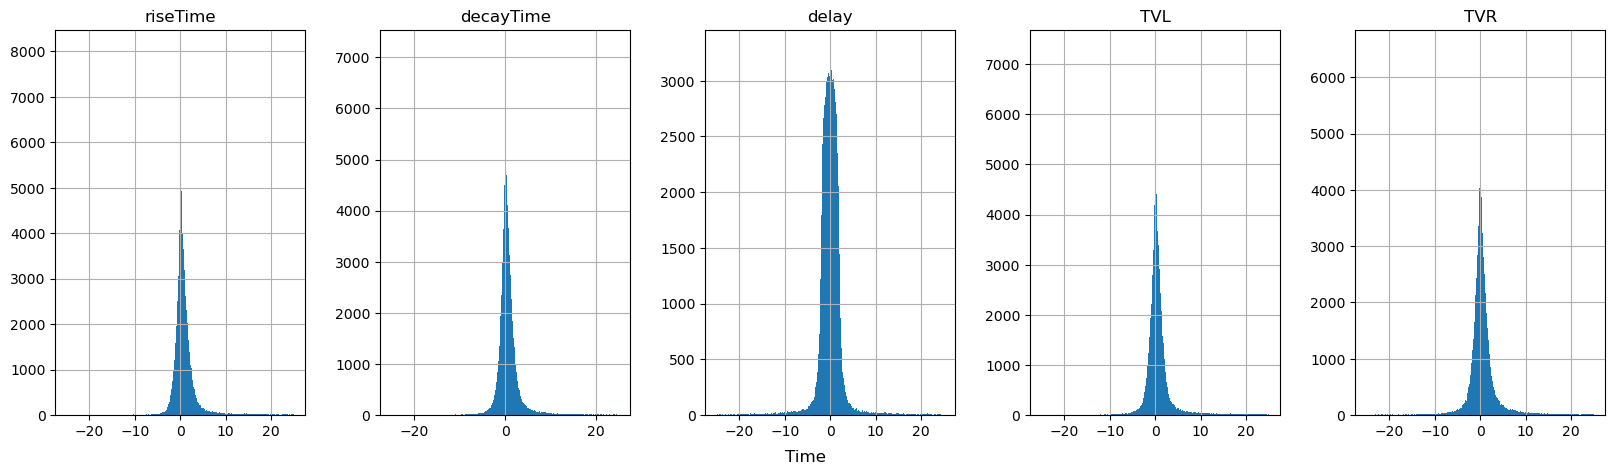

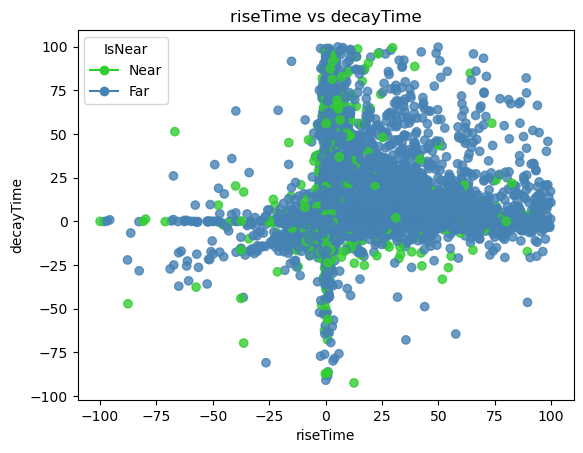

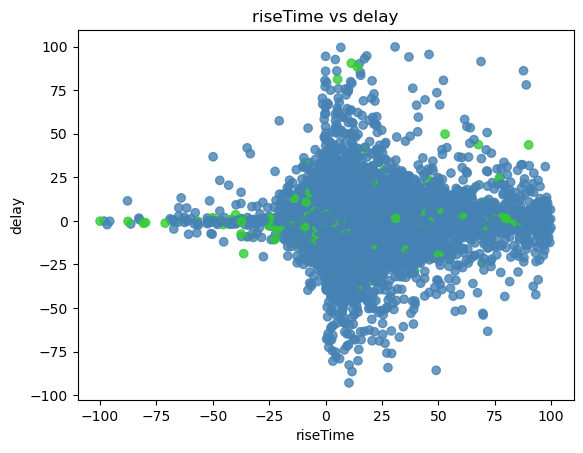

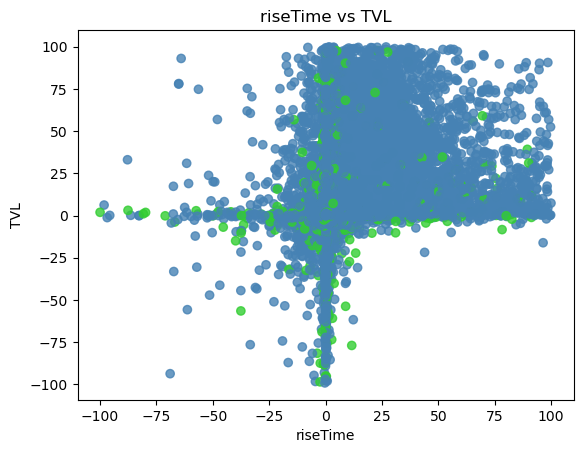

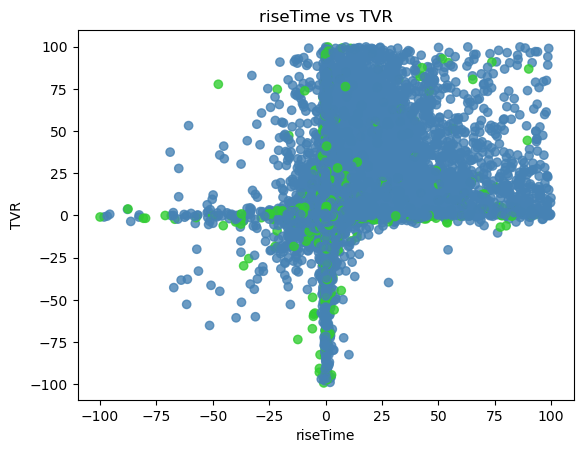

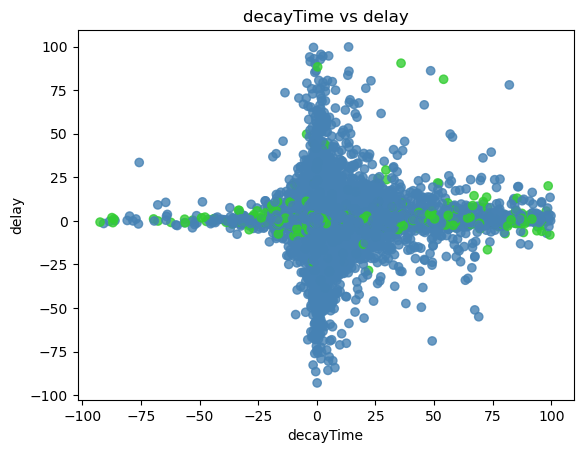

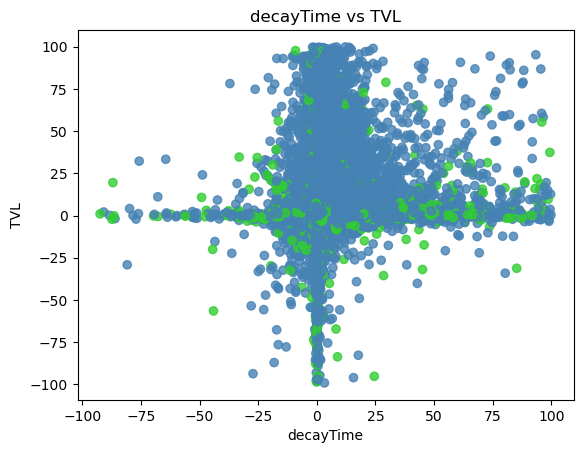

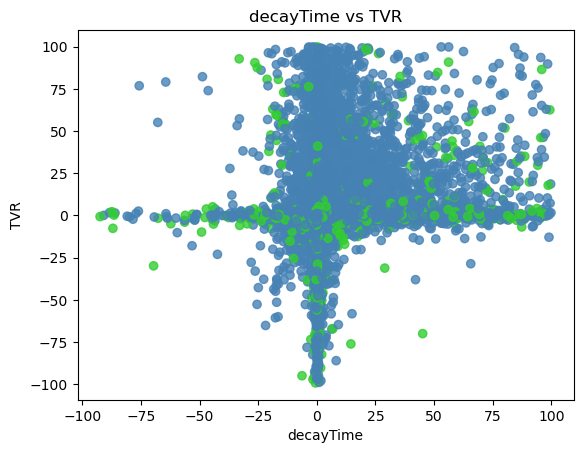

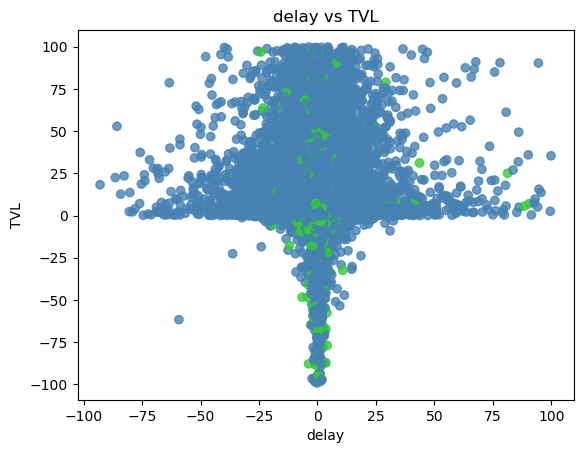

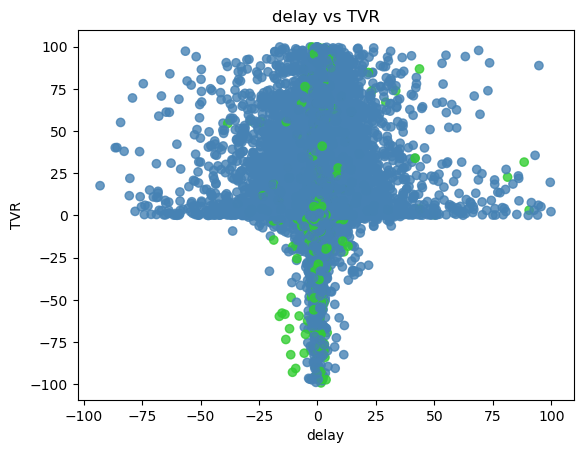

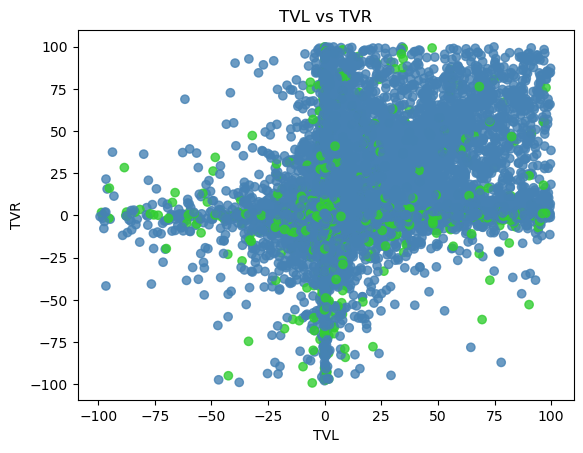

In [17]:
analyseDataset(arrays)